# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
print("-----------------------------")  
print("Beginning Data Retrieval")
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

metrics = []
city_counter = 0

# Construct a for loop
for city in cities:
    
    city_counter += 1
    print(f"Processing Record Number {city_counter}")
    
    try: 
    
        # Build query URL and request your results in Celsius
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        ### Insert a print log of each city as it's being processed with the city number and city name.
        #print(f"Processing Record {city.count} of {len(city)} | severo-kurilsk
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        latitude = weather_json['coord']['lat']
        longitude = weather_json['coord']['lon']
        metrics.append({"temperature": temperature,
                       "humidity": humidity,
                       "cloudiness": cloudiness,
                       "wind_speed": wind_speed,
                       "latitude": latitude,
                       "longitude": longitude})
        
    
    except: 
        print('No City Records Found')
        

-----------------------------
Beginning Data Retrieval
Processing Record Number 1
no cities
Processing Record Number 2
Processing Record Number 3
Processing Record Number 4
Processing Record Number 5
Processing Record Number 6
Processing Record Number 7
Processing Record Number 8
Processing Record Number 9
Processing Record Number 10
Processing Record Number 11
Processing Record Number 12
Processing Record Number 13
Processing Record Number 14
Processing Record Number 15
Processing Record Number 16
Processing Record Number 17
no cities
Processing Record Number 18
Processing Record Number 19
Processing Record Number 20
Processing Record Number 21
Processing Record Number 22
Processing Record Number 23
Processing Record Number 24
Processing Record Number 25
Processing Record Number 26
Processing Record Number 27
Processing Record Number 28
Processing Record Number 29
no cities
Processing Record Number 30
Processing Record Number 31
Processing Record Number 32
no cities
Processing Record 

Processing Record Number 277
Processing Record Number 278
Processing Record Number 279
Processing Record Number 280
no cities
Processing Record Number 281
Processing Record Number 282
Processing Record Number 283
Processing Record Number 284
Processing Record Number 285
Processing Record Number 286
Processing Record Number 287
Processing Record Number 288
Processing Record Number 289
Processing Record Number 290
Processing Record Number 291
Processing Record Number 292
Processing Record Number 293
Processing Record Number 294
Processing Record Number 295
Processing Record Number 296
Processing Record Number 297
Processing Record Number 298
Processing Record Number 299
Processing Record Number 300
Processing Record Number 301
Processing Record Number 302
no cities
Processing Record Number 303
Processing Record Number 304
Processing Record Number 305
Processing Record Number 306
Processing Record Number 307
Processing Record Number 308
Processing Record Number 309
Processing Record Numbe

Processing Record Number 551
Processing Record Number 552
Processing Record Number 553
Processing Record Number 554
Processing Record Number 555
Processing Record Number 556
Processing Record Number 557
Processing Record Number 558
Processing Record Number 559
Processing Record Number 560
Processing Record Number 561
Processing Record Number 562
Processing Record Number 563
Processing Record Number 564
Processing Record Number 565
Processing Record Number 566
Processing Record Number 567
Processing Record Number 568
Processing Record Number 569
Processing Record Number 570
Processing Record Number 571
no cities
Processing Record Number 572
Processing Record Number 573
Processing Record Number 574
Processing Record Number 575
Processing Record Number 576
Processing Record Number 577
no cities
Processing Record Number 578
Processing Record Number 579
Processing Record Number 580
Processing Record Number 581
Processing Record Number 582
Processing Record Number 583
Processing Record Numbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
cities_df = pd.DataFrame(metrics)
cities_df.to_csv('cities_df.csv', index=False)

In [27]:
cities_df

,temperature,humidity,cloudiness,wind_speed,latitude,longitude
0,6.00,60,40,4.00,53.02,39.17
1,8.98,29,1,5.70,39.36,-74.42
2,-31.83,60,5,6.20,63.75,-68.51
3,10.83,81,75,5.70,-53.15,-70.92
4,14.00,82,40,5.70,-32.25,148.62
...,...,...,...,...,...,...
537,-3.02,100,90,7.70,41.87,-103.67
538,10.05,61,0,0.47,29.04,114.56
539,24.00,41,75,3.60,34.04,-5.00
540,26.85,88,75,3.10,-6.34,106.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

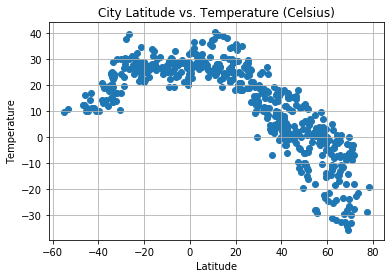

<Figure size 432x288 with 0 Axes>

In [28]:
latitude = cities_df['latitude']
temperature = cities_df['temperature']
plt.scatter(latitude, temperature)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs. Temperature (Celsius)")
plt.grid()
plt.show()
plt.savefig("Images/lat_v_temp.png")

#### Latitude vs. Humidity Plot

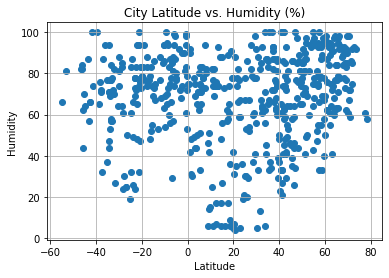

<Figure size 432x288 with 0 Axes>

In [29]:
latitude = cities_df['latitude']
humidity = cities_df['humidity']
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%)')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_hum.png")

#### Latitude vs. Cloudiness Plot

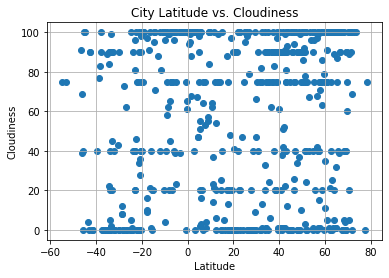

<Figure size 432x288 with 0 Axes>

In [30]:
latitude = cities_df['latitude']
cloudiness = cities_df['cloudiness']
plt.scatter(latitude, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_cloudy.png")

#### Latitude vs. Wind Speed Plot

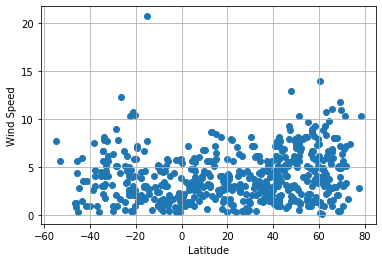

<Figure size 432x288 with 0 Axes>

In [31]:
latitude = cities_df['latitude']
wind_speed = cities_df['wind_speed']
plt.scatter(latitude, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_wind_speed.png")

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,0),text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    plt.savefig("Images/")

In [33]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df['latitude']>=0]
southern_df = cities_df.loc[cities_df['latitude']<0]

In [34]:
northern_df

,temperature,humidity,cloudiness,wind_speed,latitude,longitude
0,6.00,60,40,4.00,53.02,39.17
1,8.98,29,1,5.70,39.36,-74.42
2,-31.83,60,5,6.20,63.75,-68.51
7,16.87,42,100,6.00,43.06,44.74
9,-23.45,97,100,1.43,58.96,126.29
...,...,...,...,...,...,...
536,-4.55,59,100,6.95,70.86,29.09
537,-3.02,100,90,7.70,41.87,-103.67
538,10.05,61,0,0.47,29.04,114.56
539,24.00,41,75,3.60,34.04,-5.00


In [35]:
southern_df

,temperature,humidity,cloudiness,wind_speed,latitude,longitude
3,10.83,81,75,5.70,-53.15,-70.92
4,14.00,82,40,5.70,-32.25,148.62
5,18.85,32,0,4.74,-37.62,-73.65
6,19.35,95,58,0.64,-8.93,125.41
8,19.31,57,99,3.25,-33.65,115.33
...,...,...,...,...,...,...
514,26.28,61,100,0.61,-24.79,-65.41
518,24.15,87,1,3.34,-24.32,-47.00
529,33.65,48,100,3.08,-16.37,-58.40
532,24.25,68,81,2.95,-11.55,20.78


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.880292717632243


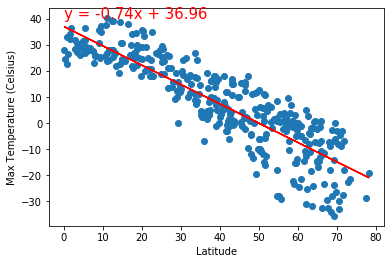

<Figure size 432x288 with 0 Axes>

In [36]:
n_max_temp = northern_df['temperature']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_max_temp, 'Max Temperature (Celsius)', (0,40))
plt.savefig("Images/ntemp_v_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6394475916946607


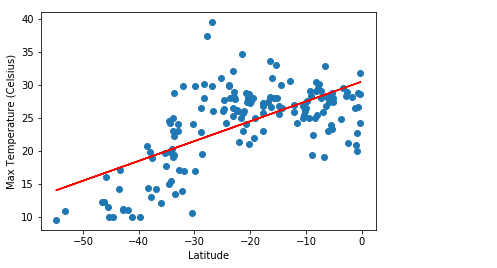

<Figure size 432x288 with 0 Axes>

In [37]:
s_max_temp = southern_df['temperature']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_max_temp, 'Max Temperature (Celsius)', (0,40))
plt.savefig("Images/stemp_v_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3412434283677101


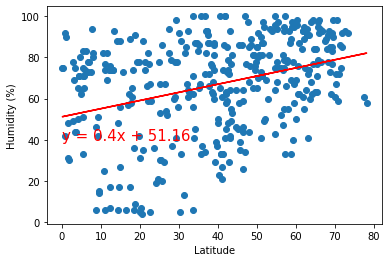

<Figure size 432x288 with 0 Axes>

In [38]:
n_humidity = northern_df['humidity']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_humidity, 'Humidity (%)', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20610872940651848


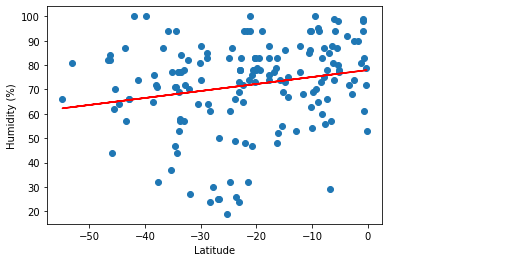

<Figure size 432x288 with 0 Axes>

In [39]:
s_humidity = southern_df['humidity']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_humidity, 'Humidity (%)', (0,40))
plt.savefig("Images/shum_v_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09385935198633816


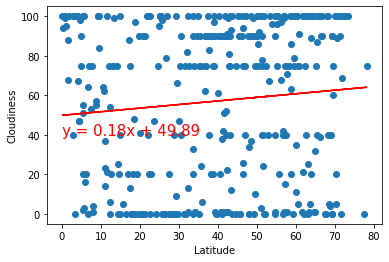

<Figure size 432x288 with 0 Axes>

In [40]:
n_cloudiness = northern_df['cloudiness']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_cloudiness, 'Cloudiness', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30634015931745984


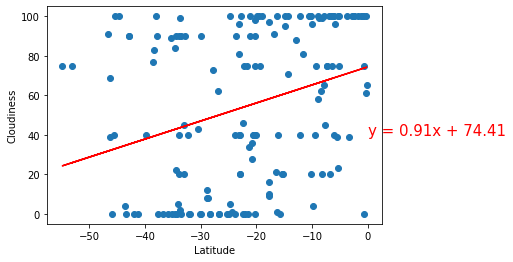

<Figure size 432x288 with 0 Axes>

In [41]:
s_cloudiness = southern_df['cloudiness']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_cloudiness, 'Cloudiness', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.22889460261760308


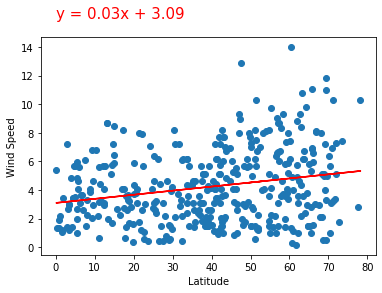

<Figure size 432x288 with 0 Axes>

In [42]:
n_wind_speed = northern_df['wind_speed']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_wind_speed, 'Wind Speed', (0,16))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1653671034056809


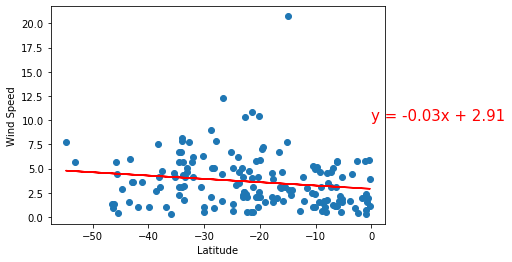

<Figure size 432x288 with 0 Axes>

In [43]:
s_wind_speed = southern_df['wind_speed']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_wind_speed, 'Wind Speed', (0,10))
plt.savefig("Images/nhum_v_lat.png")